# Sample        

In [12]:
import deepxde as dde
import numpy as np

In [13]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

In [14]:
geom = dde.geometry.Interval(-1, 1)

In [15]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

In [16]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [17]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.056396 s

'compile' took 0.156540 s



In [18]:
loss_history, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.57e-01]    [2.19e-01]    [1.02e+00]    
1000      [6.68e-04]    [5.61e-04]    [5.18e-02]    
2000      [3.91e-05]    [8.05e-05]    [1.96e-02]    
3000      [2.21e-05]    [5.94e-05]    [1.69e-02]    
4000      [1.30e-05]    [5.45e-05]    [1.62e-02]    
5000      [6.14e-05]    [1.06e-04]    [2.26e-02]    
6000      [3.15e-06]    [3.47e-05]    [1.29e-02]    
7000      [2.06e-06]    [3.12e-05]    [1.22e-02]    
8000      [1.35e-05]    [4.39e-05]    [1.45e-02]    
9000      [1.66e-05]    [4.75e-05]    [1.51e-02]    
10000     [7.67e-07]    [2.42e-05]    [1.08e-02]    

Best model at step 10000:
  train loss: 7.67e-07
  test loss: 2.42e-05
  test metric: [1.08e-02]

'train' took 2.492565 s



Saving loss history to data/loss.dat ...
Saving training data to data/train.dat ...
Saving test data to data/test.dat ...


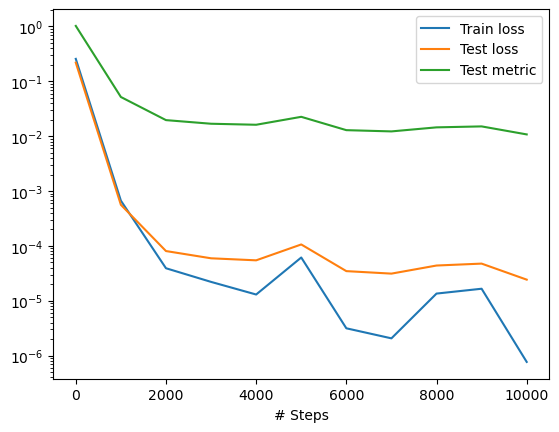

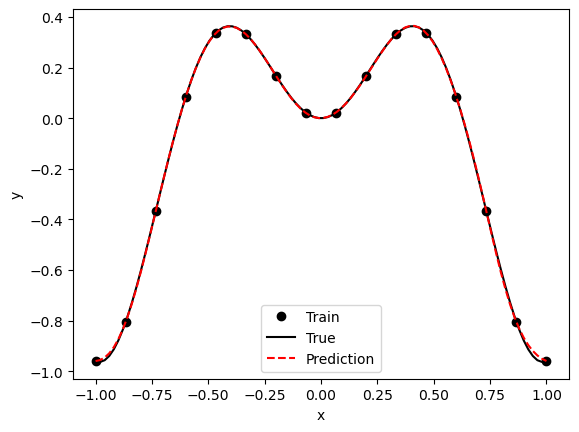

In [19]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True, output_dir="data")